# importing libraries and datasets

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./../List of Countries by Sugarcane Production.csv')
data.head()


,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [3]:
data.shape

(103, 7)

# removing unnecessary commas and dots /data entry errors

In [4]:
data["Production (Tons)"] = data["Production (Tons)"].str.replace(".","")
data["Production per Person (Kg)"] = data["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
data["Acreage (Hectare)"] = data["Acreage (Hectare)"].str.replace(".","")
data["Yield (Kg / Hectare)"] = data["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [5]:
data.rename(columns={"Production (Tons)":"Production(Tons)"}, inplace=True)
data.rename(columns={"Production per Person (Kg)":"ProductionperPerson(Kg)"}, inplace=True)
data.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"}, inplace=True)
data.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"}, inplace=True)

In [6]:
data.head()

,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


# Removing NUll Rows

In [7]:
data.isnull().sum()

Unnamed: 0                 0
Country                    0
Continent                  0
Production(Tons)           0
ProductionperPerson(Kg)    0
Acreage(Hectare)           1
Yield(Kg/Hectare)          1
dtype: int64

In [8]:
data.dropna(inplace=True)
data = data.reset_index()

In [9]:
data.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [10]:
data.drop(["index","Unnamed: 0"],axis = 1, inplace=True)

In [11]:
data.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [12]:
print(data.dtypes)

Country                    object
Continent                  object
Production(Tons)           object
ProductionperPerson(Kg)    object
Acreage(Hectare)           object
Yield(Kg/Hectare)          object
dtype: object


In [13]:
data["Production(Tons)"] = data['Production(Tons)'].astype(float)
data["ProductionperPerson(Kg)"] = data['ProductionperPerson(Kg)'].astype(float)
data["Acreage(Hectare)"] = data['Acreage(Hectare)'].astype(float)
data["Yield(Kg/Hectare)"] = data['Yield(Kg/Hectare)'].astype(float)

In [14]:
data.nunique()

Country                    102
Continent                    6
Production(Tons)           102
ProductionperPerson(Kg)    101
Acreage(Hectare)           101
Yield(Kg/Hectare)          102
dtype: int64

In [15]:
data.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [16]:
data['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

# Univariate analysis

In [17]:
data.head()

,Country,Continent,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### how many contries produces sugarcane from each continent


In [18]:
data["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

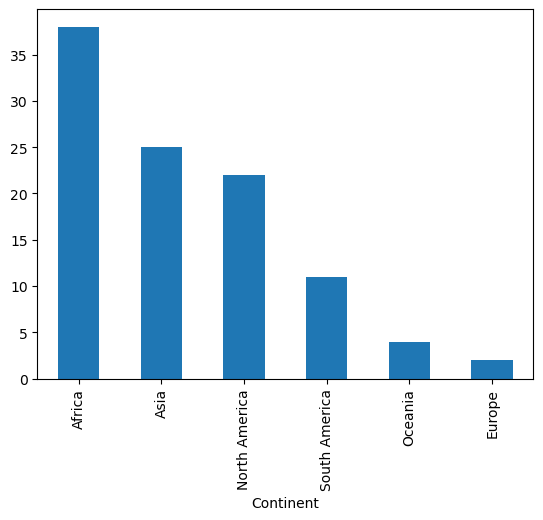

In [19]:
data['Continent'].value_counts().plot(kind="bar")

# distribution of columns


C:\Users\omalb\AppData\Local\Temp\ipykernel_5500\1309030376.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Production(Tons)'])
C:\Users\omalb\AppData\Local\Temp\ipykernel_5500\1309030376.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ProductionperPerson(Kg)'])
C:\Users\omal

[]

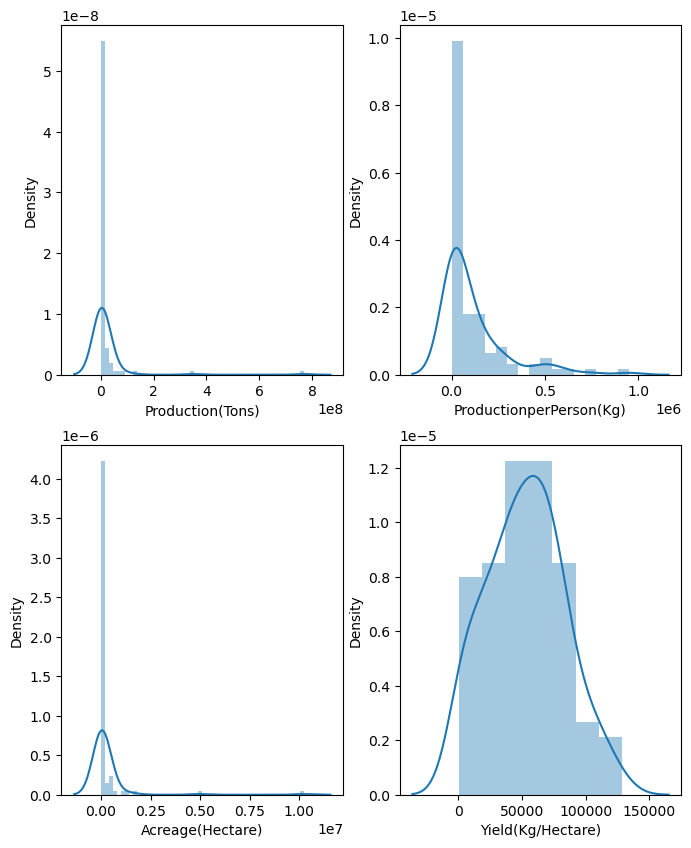

In [20]:
plt.figure(figsize=(8,10))
plt.subplot(2,2,1)
sns.distplot(data['Production(Tons)'])
plt.subplot(2,2,2)
sns.distplot(data['ProductionperPerson(Kg)'])
plt.subplot(2,2,3)
sns.distplot(data['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.distplot(data['Yield(Kg/Hectare)'])


plt.plot()

# Checking outliers

[]

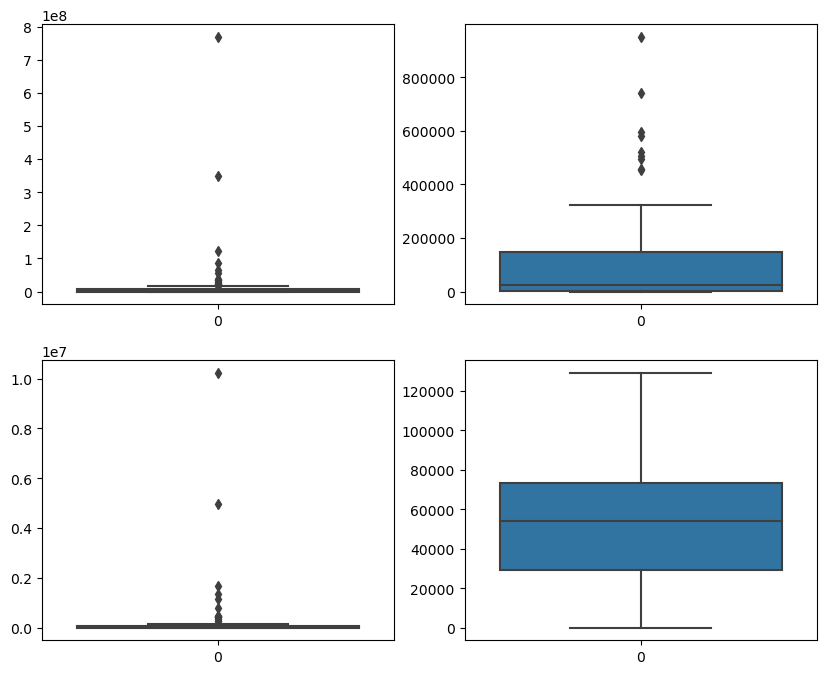

In [21]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(data['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(data['ProductionperPerson(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(data['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(data['Yield(Kg/Hectare)'])


plt.plot()

In [22]:
data.describe()

,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


# bivariate analysis

### Which Contry Produce how many percent of sugarcane

In [23]:
new_data1 = data[["Country", "Production(Tons)"]].set_index("Country")
new_data1["PercentByCountry"] = new_data1["Production(Tons)"]*100/new_data1["Production(Tons)"].sum()

<Axes: ylabel='PercentByCountry'>

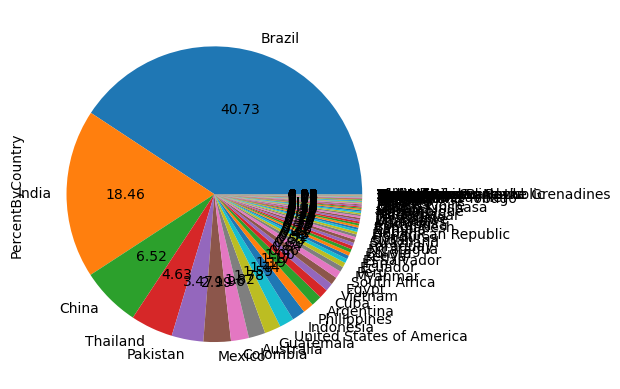

In [24]:
new_data1["PercentByCountry"].plot(kind="pie", autopct="%.2f")

### which Continent Produce how many sugarcane Production

In [25]:
new_data2 = data.groupby("Continent")['Production(Tons)'].sum().sort_values()
new_data2

Continent
Europe                5823.0
Oceania           36177574.0
Africa            89681472.0
North America    173995947.0
Asia             721930425.0
South America    865588126.0
Name: Production(Tons), dtype: float64

<Axes: ylabel='Production(Tons)'>

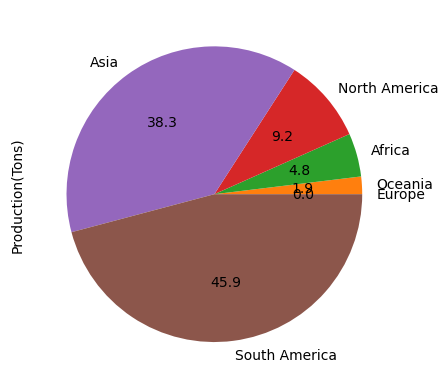

In [26]:
new_data2.plot(kind = "pie", autopct='%.1f')

<Axes: xlabel='Continent'>

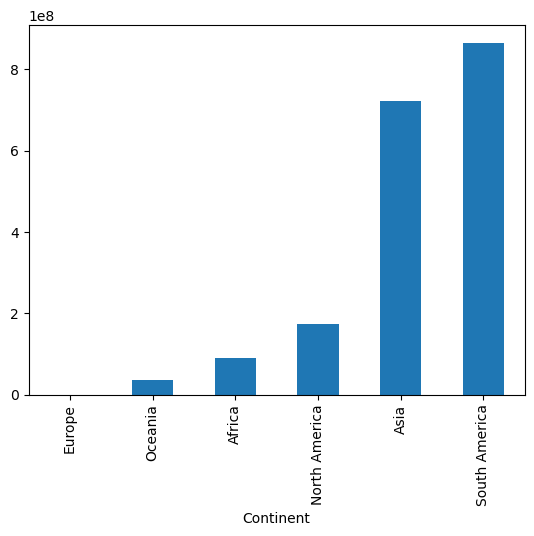

In [27]:
new_data2.plot(kind = "bar")

### Top 10 contries which having highest production

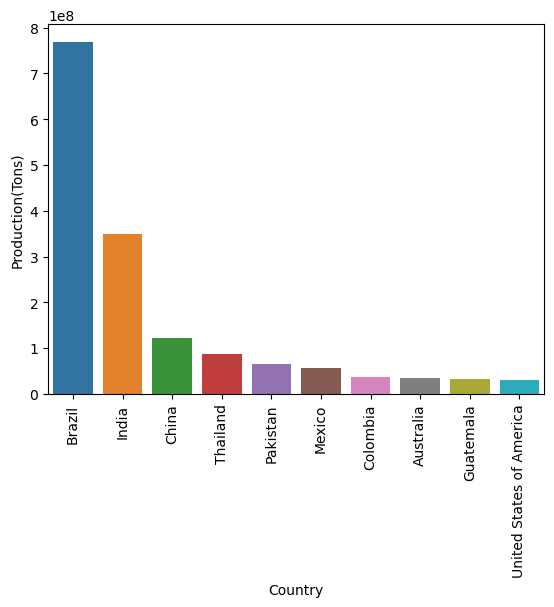

In [28]:
new_data3 = data.sort_values(by="Production(Tons)", ascending=False).head(10)
ax = sns.barplot(data = new_data3, x = "Country", y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### Top 10 contries which having highest Land (Acreage)

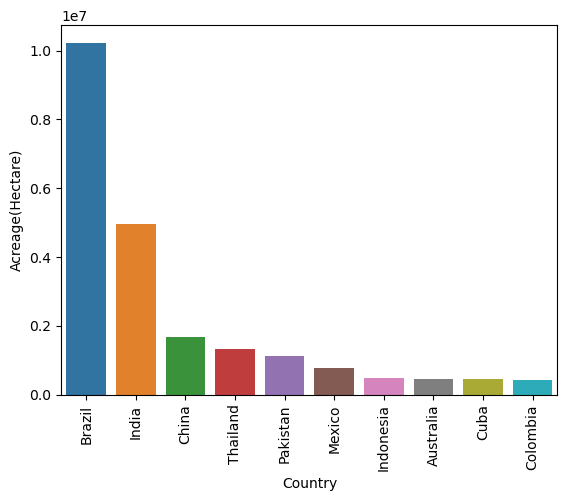

In [29]:
new_data3 = data.sort_values(by="Acreage(Hectare)", ascending=False).head(10)
ax = sns.barplot(data = new_data3, x = "Country", y = "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### whitch country has the highest yield per hectare


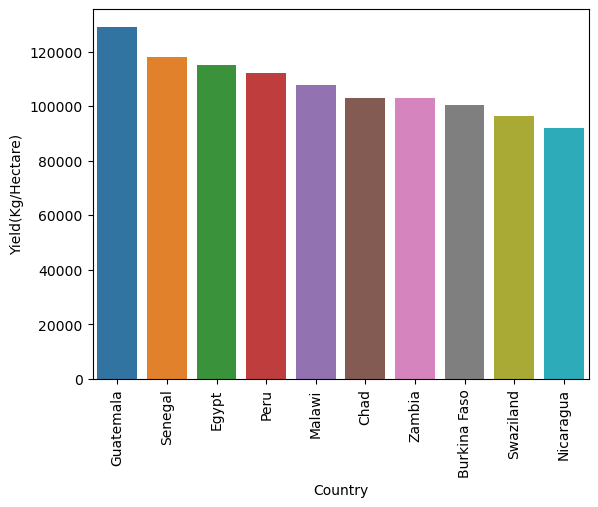

In [30]:
new_data3 = data.sort_values(by="Yield(Kg/Hectare)", ascending=False).head(10)
ax = sns.barplot(data = new_data3, x = "Country", y = "Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### Top 10 whitch country has the highest Production

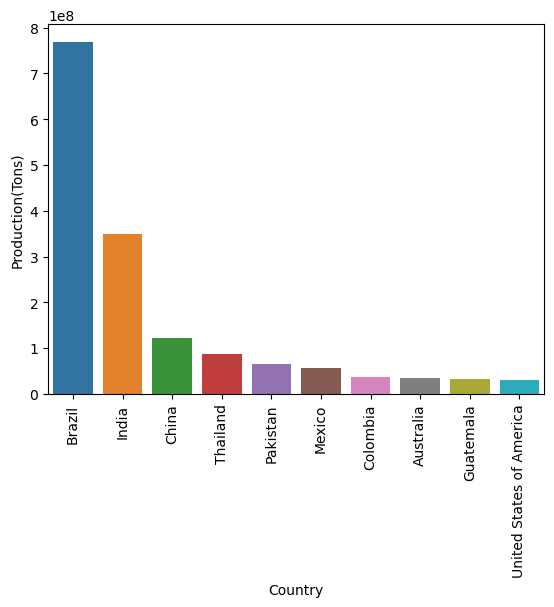

In [34]:
new_data3 = data.sort_values(by="Production(Tons)", ascending=False)
ax = sns.barplot(data = new_data3.head(10), x="Country", y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Correlation

In [43]:
data.corr(numeric_only=True)

,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
ProductionperPerson(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

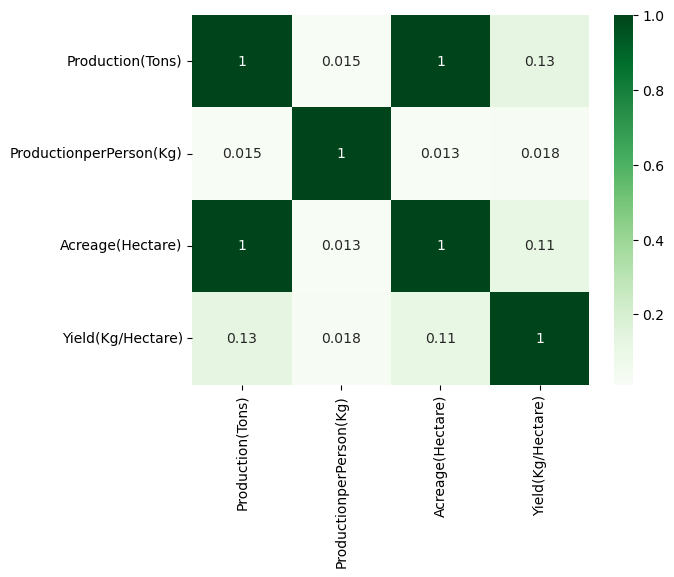

In [54]:
sns.heatmap(data.corr(numeric_only=True), annot = True, cmap="Greens")

### Do contries  with highest land Produce more Sugarcane

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

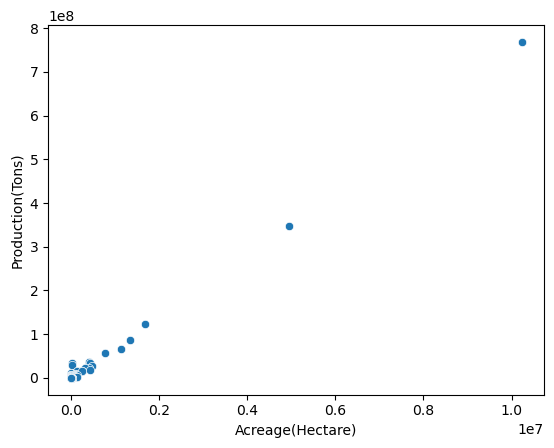

In [57]:
# acreage are highly corelate with prodcution thus high land produce high production
sns.scatterplot(data = data, x="Acreage(Hectare)", y="Production(Tons)")

### do contries which yield it more sugarcane per hector produces more sugar in total

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

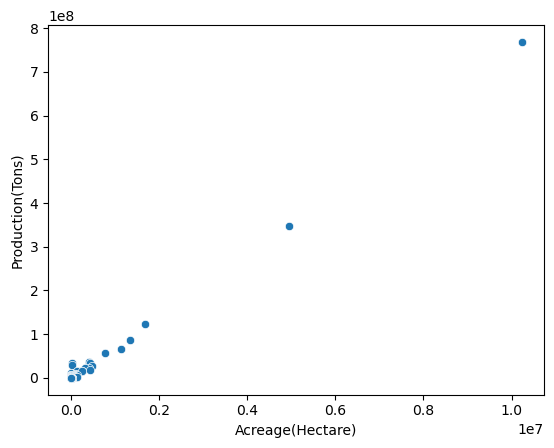

In [59]:
sns.scatterplot(data = data,x ='Acreage(Hectare)',y = 'Production(Tons)' )

# analysis of contient

In [63]:
continent_data = data.groupby("Continent").sum()
continent_data

,Country,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


### which continent maximum sugarcane

In [76]:
continent_data['Production(Tons)'].sort_values(ascending=False)

Continent
South America    865588126.0
Asia             721930425.0
North America    173995947.0
Africa            89681472.0
Oceania           36177574.0
Europe                5823.0
Name: Production(Tons), dtype: float64

<Axes: xlabel='Continent'>

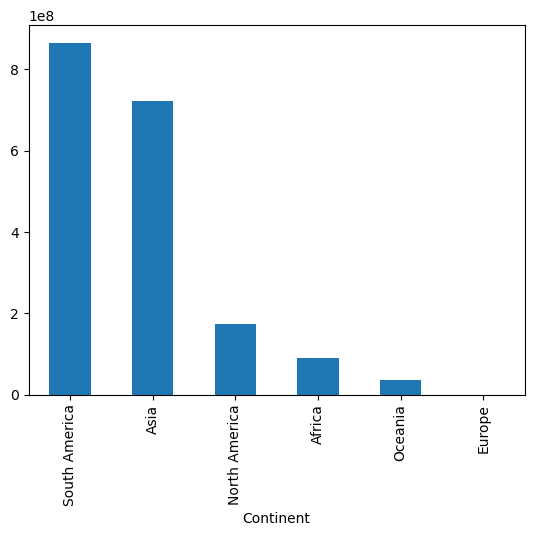

In [65]:
continent_data['Production(Tons)'].sort_values(ascending=False).plot(kind="bar")

### do number of contries in a continent effect production of sugarcane?

In [85]:
# No because Africa has highest no of countries but maximum production is South America. and similar for others contries
continent_data['number_of_countries'] = data.groupby('Continent').count()['Country']
continent_names = continent_data.index.to_list()
continent_data

,Country,Production(Tons),ProductionperPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


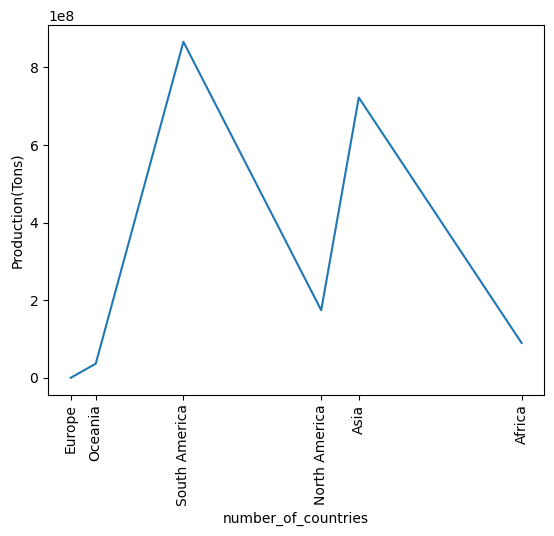

In [88]:
sns.lineplot(data = continent_data,x = 'number_of_countries',y = 'Production(Tons)')
plt.xticks(continent_data['number_of_countries'],continent_names,rotation = 90)
plt.show()